# 4.9- (2) Intro to Data Visualizations

### This script contains the following points:

#### 1. Import Libraries
#### 2. Import Data
#### 3. Creating Bar Charts
#### 4. Exporting Charts
#### 5. Creating Histograms and Scatterplots
#### 6. Sampling Data
#### 7. Create Line Plot

### 1. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


### 2. Import Data

In [1]:
path = r'/Users/amritamaniram/Desktop/Instacart Basket Analysis 2023'

In [3]:
df_merged_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_all.pkl'))

### 3. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

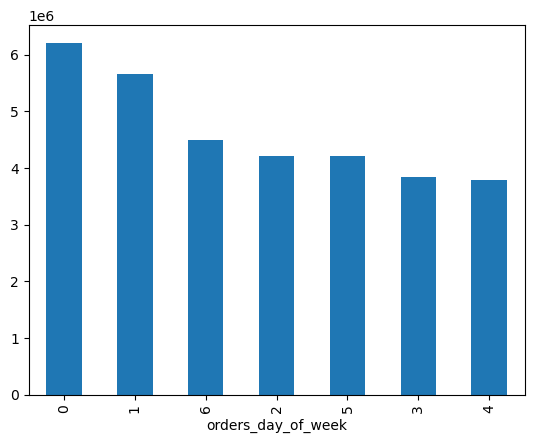

In [5]:
df_merged_all['orders_day_of_week'].value_counts().plot.bar()

In [6]:
# Sort in order by days of the week index

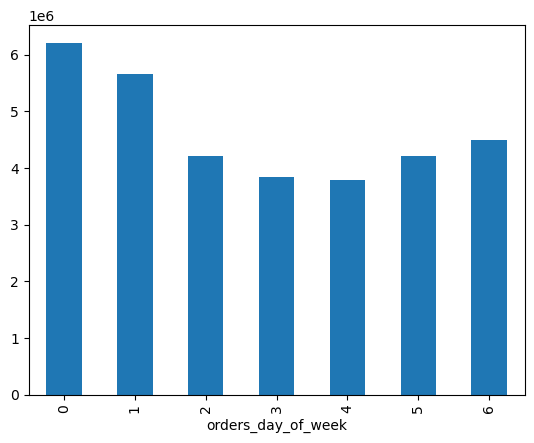

In [7]:
Bar = df_merged_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# Add colors to bar chart

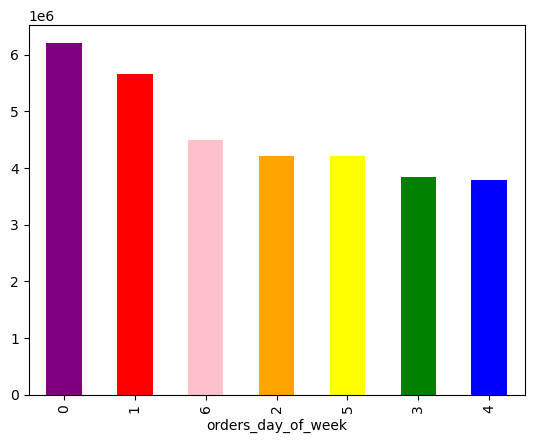

In [9]:
bar = df_merged_all['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### 4. Exporting Charts

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### 5. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

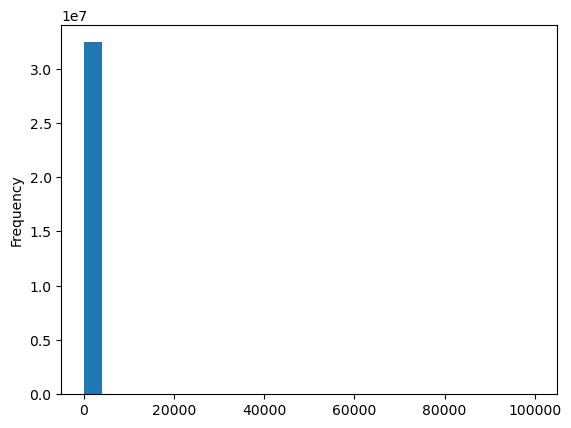

In [12]:
df_merged_all['prices'].plot.hist(bins=25)

^ This doesn't look right. We need to find the issue.

In [13]:
df_merged_all['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
df_merged_all['prices'].mean()

11.981143922966263

In [15]:
df_merged_all['prices'].median()

7.4

In [16]:
df_merged_all['prices'].max()

99999.0

^ There is an error with the data

<Axes: xlabel='prices', ylabel='prices'>

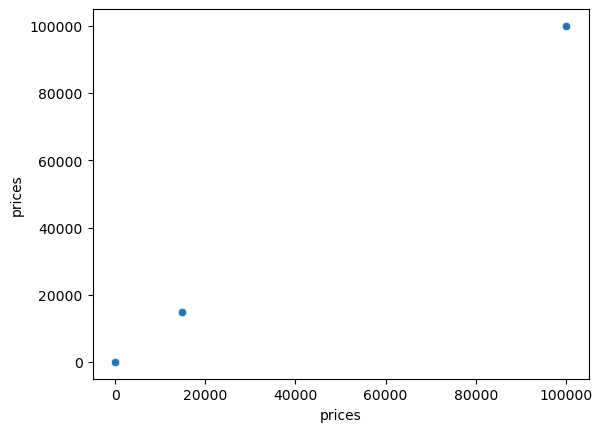

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_merged_all)

In [18]:
df_merged_all.loc[df_merged_all['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,frequency_flag,First Name,Last Name,Gender,State,Age,Number_of_Dependants,Marital_Status,income,_merge
23056,33664,2 % Reduced Fat Milk,84,16,99999.0,1489110,43360,prior,3,1,...,Frequent Customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
23057,33664,2 % Reduced Fat Milk,84,16,99999.0,2322035,43360,prior,4,1,...,Frequent Customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
23058,33664,2 % Reduced Fat Milk,84,16,99999.0,420339,43360,prior,5,1,...,Frequent Customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
23059,33664,2 % Reduced Fat Milk,84,16,99999.0,2912515,43360,prior,7,2,...,Frequent Customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
28751,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,518829,54136,prior,22,1,...,Regular customer,Benjamin,Parsons,Male,New Jersey,40,0,single,160524,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32413400,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3288900,136909,prior,1,5,...,Frequent Customer,Deborah,Dillon,Female,New Jersey,30,2,married,161606,both
32413401,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,285306,136909,prior,4,1,...,Frequent Customer,Deborah,Dillon,Female,New Jersey,30,2,married,161606,both
32413402,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2744314,136909,prior,13,6,...,Frequent Customer,Deborah,Dillon,Female,New Jersey,30,2,married,161606,both
32426210,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2716179,2700,prior,7,2,...,Frequent Customer,Charles,Crosby,Male,Washington,67,0,divorced/widowed,225873,both


In [20]:
# Prices are incorrect for these items 

In [23]:
# Since we don't have accurate prices, we are going to change those prices to NaN

In [24]:
df_merged_all.loc[df_merged_all['prices'] >100, 'prices'] = np.nan

In [25]:
df_merged_all['prices'].max()

25.0

$25 seems like a much more realistic max price for a grocery item

#### Clean histogram

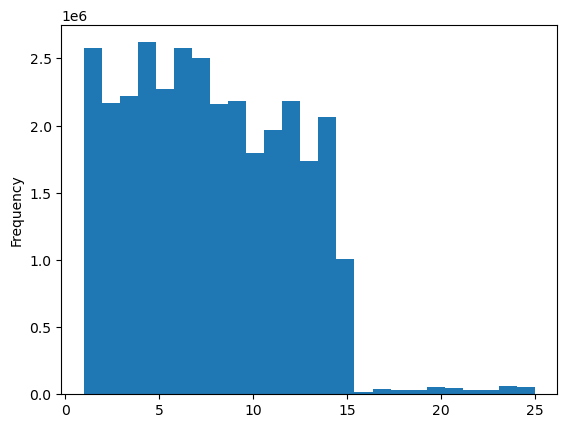

In [27]:
hist = df_merged_all['prices'].plot.hist(bins=25)

#### Export histogram

In [29]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### 6. Sampling Data

In [32]:
# Create the seed

In [33]:
np.random.seed(4)

In [34]:
# We are splitting df into to df's 70/30 ratio

In [36]:
dev = np.random.rand(len(df_merged_all)) <= 0.7

In [37]:
dev

array([False,  True, False, ..., False,  True,  True])

In [38]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [39]:
# Store 70% of the df as 'big'

In [40]:
big = df_merged_all[dev]

In [41]:
# Store 30% of the df as 'small'

In [42]:
small = df_merged_all[~dev]

In [43]:
# Verify update

In [44]:
len(df_merged_all)

32434212

In [45]:
len(big) + len(small)

32434212

^ Numbers match. Update verified

In [46]:
df_2 = small[['orders_day_of_week', 'prices']]

### 7. Create Line Chart

In [47]:
# Create line chart for 'small' df

/Users/amritamaniram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amritamaniram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


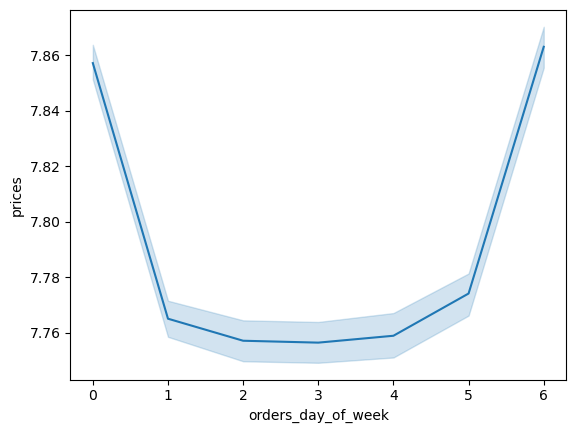

In [48]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [49]:
# Export line chart

In [50]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow.png'))

### 8. 'order_hour_of_day' Histogram 

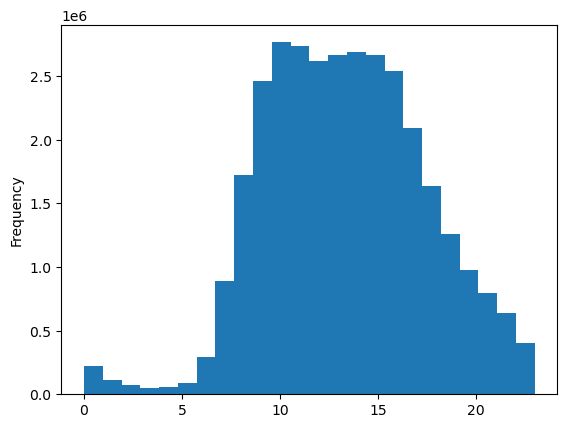

In [52]:
hist_order_hour = df_merged_all['order_hour_of_day'].plot.hist(bins = 24)

^ Histogram shows that the least and most busiest times of the day at a glance. The busiest times being 9 am to 6 pm. 

In [53]:
# Export Histogram

In [54]:
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour.png'))

### 9. 'loyalty_flag' Bar Chart

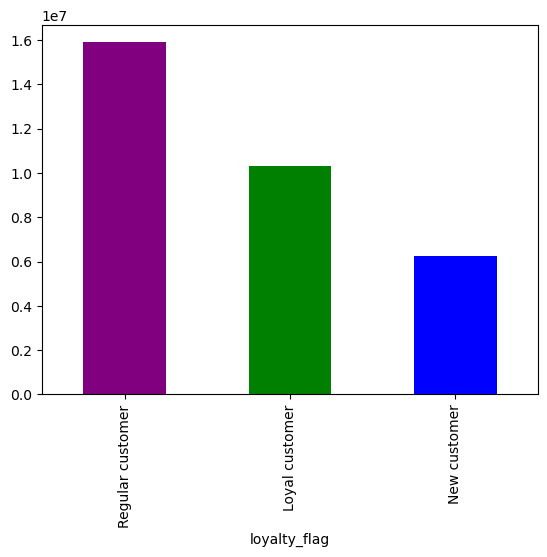

In [58]:
bar_loyalty_flag = df_merged_all['loyalty_flag'].value_counts().plot.bar(color=['purple', 'green', 'blue'])

In [59]:
# Export Bar Chart

In [60]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### 10. Expenditure differences

In [61]:
# Create subset for 'order_hour_of_day' and 'prices'

In [63]:
df_3 = small[['order_hour_of_day', 'prices']]

### 11. Expenditure line chart

/Users/amritamaniram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amritamaniram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


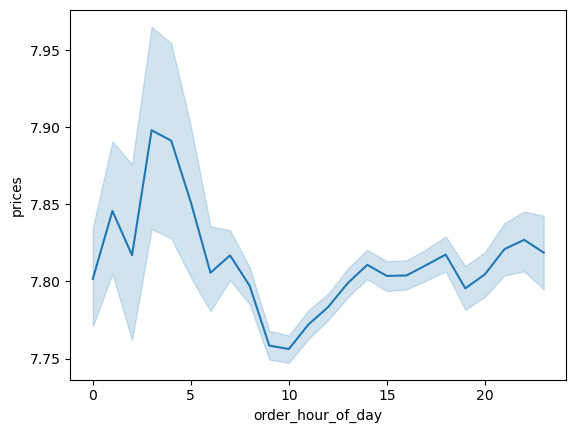

In [66]:
line_df_3 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [67]:
# Export line chart

In [76]:
line_df_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day_and_price.png'))

### 12. Connection between age and number of dependants

In [69]:
# Create subset for 'age' and 'num_of_dependants'

In [71]:
df_4 = small[['Age','Number_of_Dependants']]

In [72]:
# Create line chart for df_4

/Users/amritamaniram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amritamaniram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


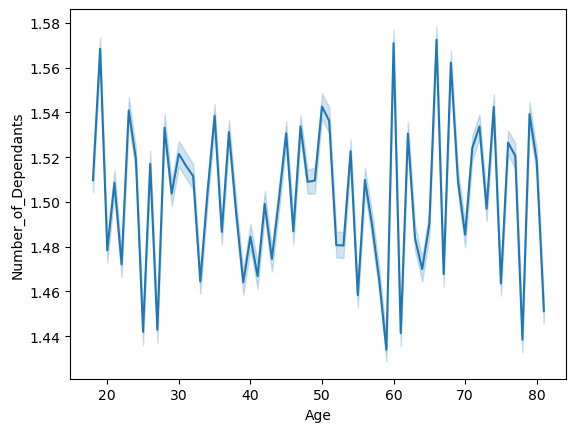

In [73]:
line_df_4 = sns.lineplot(data=df_4, x='Age', y='Number_of_Dependants')

^ This line chart indicates that there is no correlation between age and number of dependants.

In [74]:
# Export line chart

In [75]:
line_df_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants_correlation.png'))

### 13. Scatterplot- Age and Income

In [77]:
# Create scatterplot for age and income

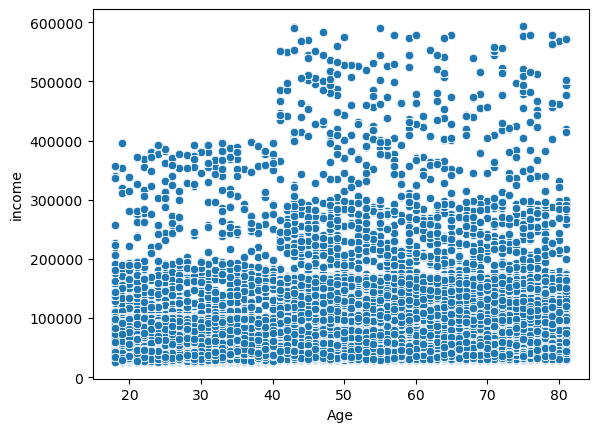

In [78]:
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_merged_all)

^ This scatterplot does not indicate any correlation between age and income. There is a high density of plots under 200k, indicating that a majority of individuals have an income under 200k. For ages 40 and above, there seems to be more people with incomes higher than 200k and under 600k. 

In [79]:
# Export Scatterplot

In [80]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

In [81]:
## Note to tutor

In [82]:
### All exported '.png' files are under each chart 